# <font color = "Red">  Using Prophet to precdict Avocado Prices</font> <font color = "DarkGreen"> *By Harshit Dawar*

## <font color = "brown"> Information about Dataset

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Columns present in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### <font color = "brown"> Instructions for installation of *fbprochet* package

- Install it by pip install fbprophet
- Otherwise, install it by conda install -c conda-forge fbprophet
- Prophet is a tool to forecast time series data based on additive model in which non-linear trends are fit based on fixed time.
- For more information, visit: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api

## <font color = "Brown"> Importing Required Libraries 

In [3]:
from fbprophet import Prophet as Pro
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## <font color = "Brown"> Exploring the Data

In [4]:
dataframe = pd.read_csv("avocado.csv")

In [13]:
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
dataframe.shape

(18249, 14)

In [12]:
dataframe.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [14]:
# Sorting the Data based on Date

dataframe = dataframe.sort_values("Date")

In [16]:
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


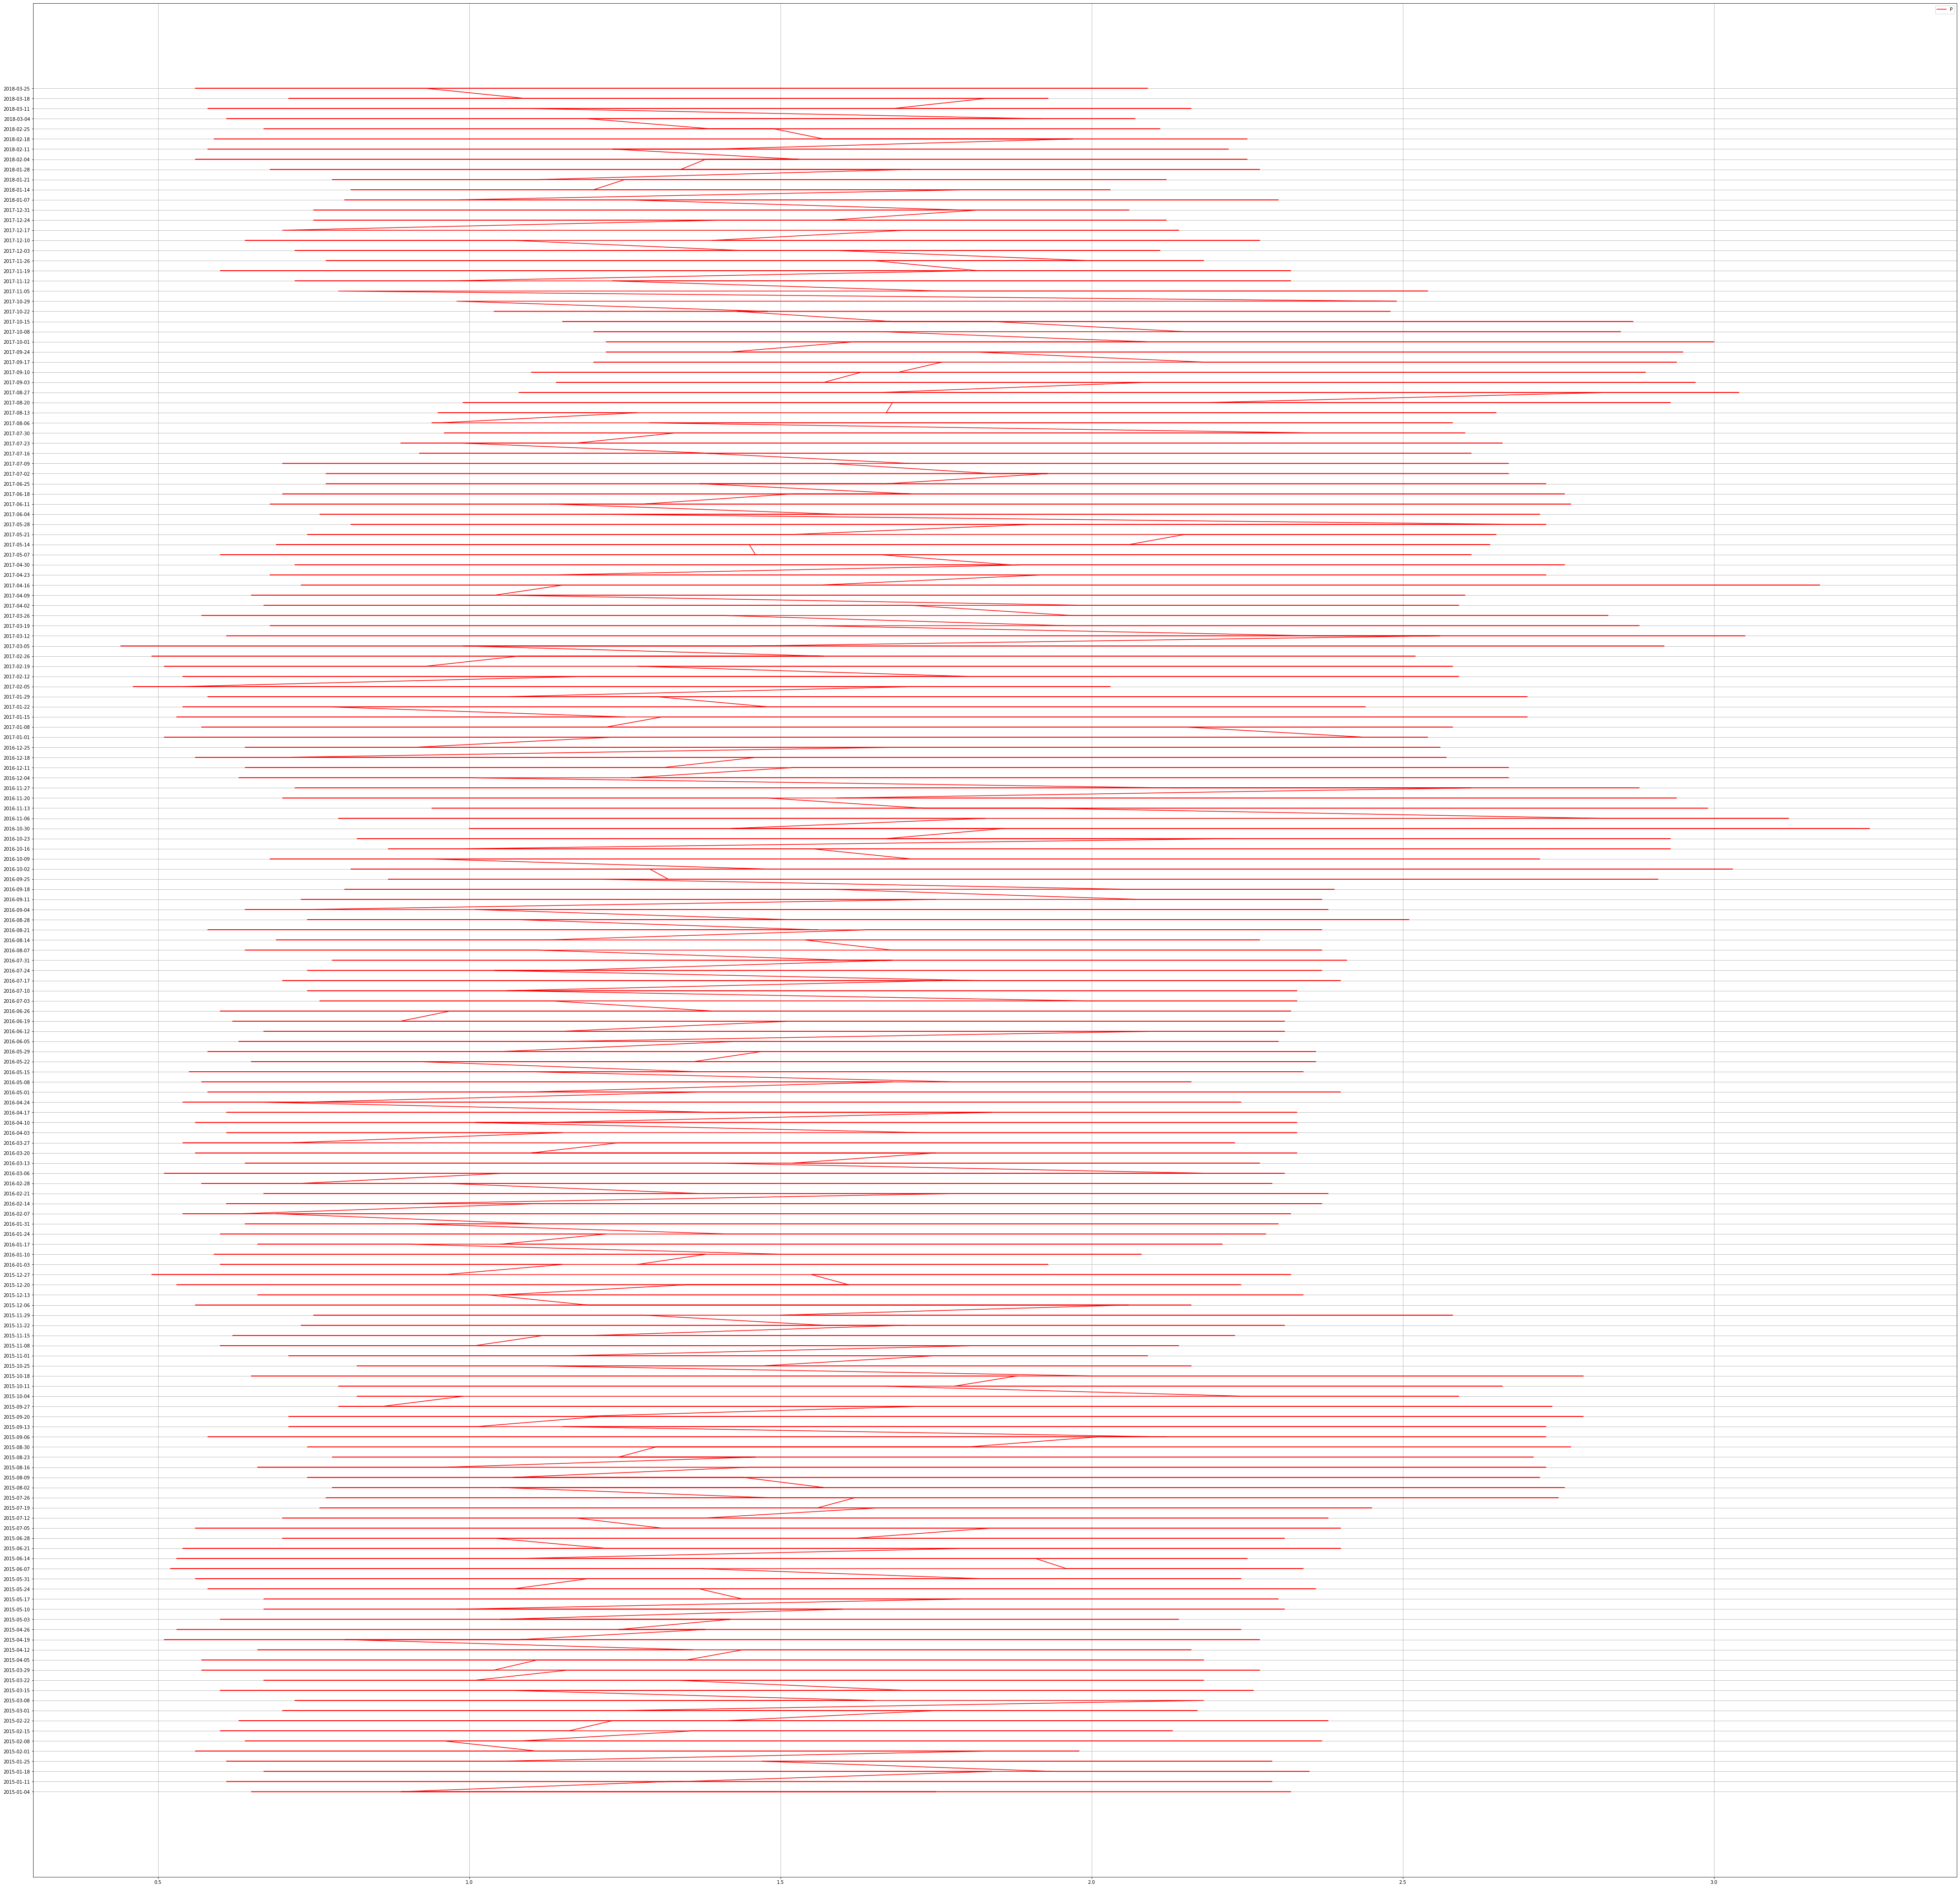

In [44]:
# Plotting Date VS Pricing

plt.figure(figsize = (75,75))
plt.plot(  dataframe["AveragePrice"], dataframe["Date"], c = 'red' )
plt.grid()
plt.legend(labels = "Price")
plt.show()

In [45]:
dataframe["AveragePrice"].min(), dataframe["AveragePrice"].max()

(0.44, 3.25)

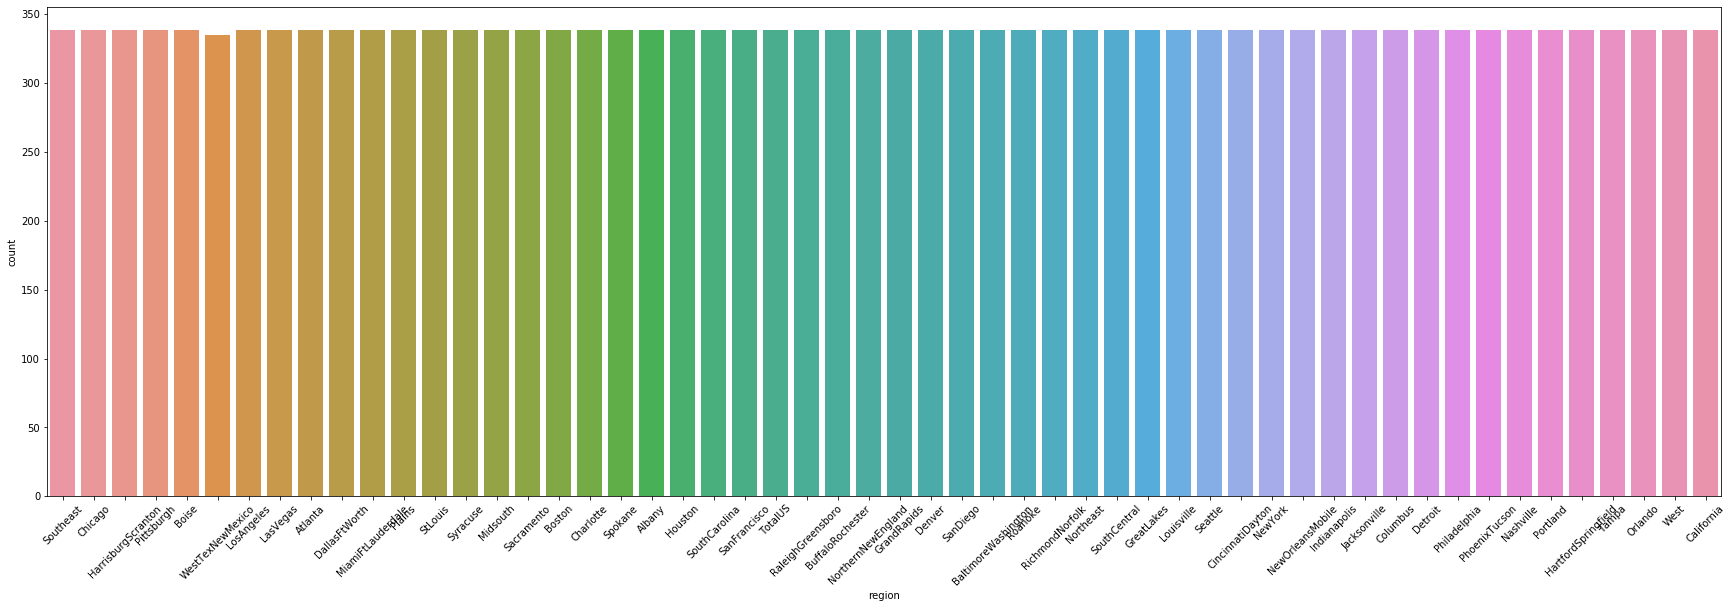

In [74]:
# Here count refers to the count of the regions in the data

plt.figure(figsize = (30,9))
sns.countplot(x = "region",  data = dataframe)
plt.xticks(rotation =  45)     # For rotating the font 
plt.show()

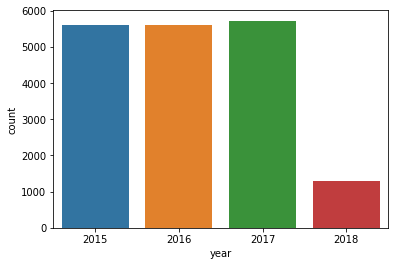

In [59]:
sns.countplot(x = "year", data = dataframe)
plt.show()

In [68]:
# Selecting only the date and average price from the Dataset, as they are only required for Prophet.

prophet_dataframe = dataframe.iloc[:, 1:3]

# Another method is prophet_dataframe = dataframe[["Date","AveragePrice"]]

In [70]:
prophet_dataframe

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


## <font color = "Brown"> Preparing Data for Prophet

In [76]:
prophet_dataframe = prophet_dataframe.rename(columns = {"Date" : "ds", "AveragePrice" : "y"})

In [77]:
prophet_dataframe

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


## <font color = "Brown"> Creating, Training, Testing, and Visualising Model

In [78]:
model = Pro()

In [79]:
model.fit(prophet_dataframe)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
#forecasting the future

future10 = model.make_future_dataframe(periods = 3650) # For 10 years in future
prediction10 = model.predict(future10)

In [84]:
prediction10

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499120,0.906784,1.868737,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
1,2015-01-04,1.499120,0.889512,1.870515,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
2,2015-01-04,1.499120,0.946156,1.878699,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
3,2015-01-04,1.499120,0.862063,1.858384,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
4,2015-01-04,1.499120,0.880276,1.860171,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21894,2028-03-18,-1.241279,-7.581675,5.447431,-7.554666,5.378913,-0.088996,-0.088996,-0.088996,-0.088996,-0.088996,-0.088996,0.0,0.0,0.0,-1.330275
21895,2028-03-19,-1.242011,-7.774534,5.253092,-7.557977,5.380609,-0.087940,-0.087940,-0.087940,-0.087940,-0.087940,-0.087940,0.0,0.0,0.0,-1.329951
21896,2028-03-20,-1.242743,-7.721098,5.294690,-7.558495,5.382304,-0.086596,-0.086596,-0.086596,-0.086596,-0.086596,-0.086596,0.0,0.0,0.0,-1.329339
21897,2028-03-21,-1.243474,-7.715338,5.322579,-7.559013,5.383999,-0.084964,-0.084964,-0.084964,-0.084964,-0.084964,-0.084964,0.0,0.0,0.0,-1.328439


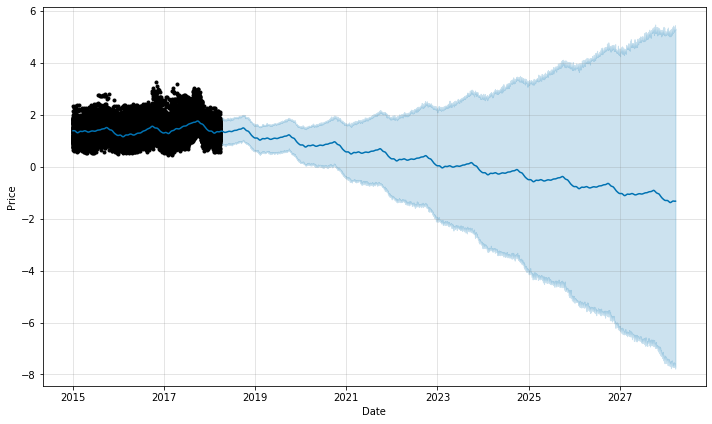

In [85]:
prediction_figure10 = model.plot(prediction10, xlabel = "Date", ylabel = "Price")

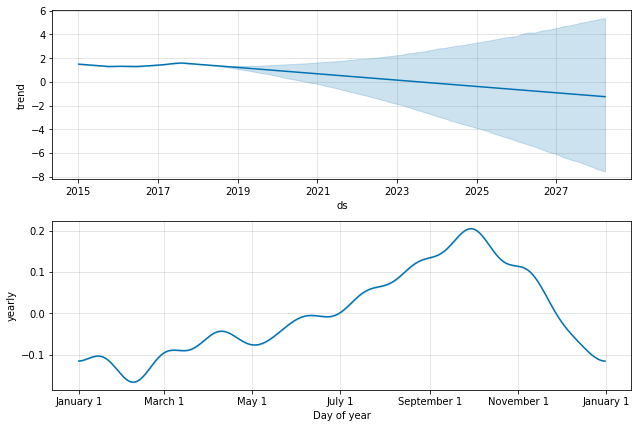

In [86]:
figure10 = model.plot_components(prediction10)

In [87]:
future3 = model.make_future_dataframe(periods = 1095)
prediction3 = model.predict(future3)

In [88]:
prediction3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499120,0.895197,1.895089,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
1,2015-01-04,1.499120,0.899698,1.850592,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
2,2015-01-04,1.499120,0.885477,1.912266,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
3,2015-01-04,1.499120,0.865235,1.890507,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
4,2015-01-04,1.499120,0.898396,1.850312,1.499120,1.499120,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,-0.114387,0.0,0.0,0.0,1.384733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,2021-03-20,0.628122,-0.620070,1.748299,-0.450981,1.701142,-0.086959,-0.086959,-0.086959,-0.086959,-0.086959,-0.086959,0.0,0.0,0.0,0.541163
19340,2021-03-21,0.627390,-0.548368,1.747296,-0.452710,1.702073,-0.085399,-0.085399,-0.085399,-0.085399,-0.085399,-0.085399,0.0,0.0,0.0,0.541992
19341,2021-03-22,0.626659,-0.563558,1.743520,-0.454438,1.703003,-0.083557,-0.083557,-0.083557,-0.083557,-0.083557,-0.083557,0.0,0.0,0.0,0.543102
19342,2021-03-23,0.625927,-0.594198,1.729869,-0.456166,1.702744,-0.081450,-0.081450,-0.081450,-0.081450,-0.081450,-0.081450,0.0,0.0,0.0,0.544477


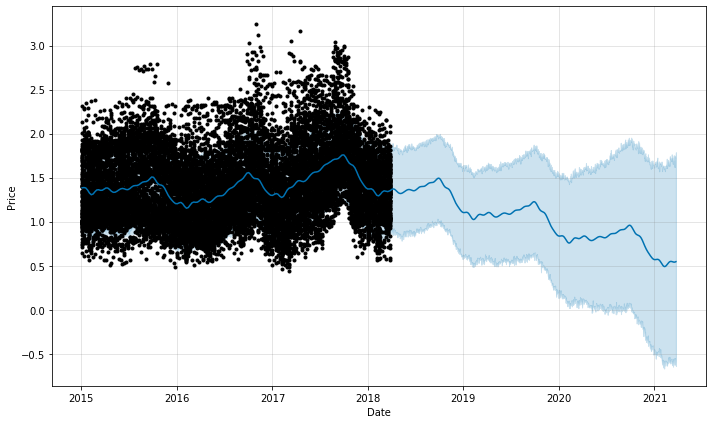

In [91]:
# Black Dots are the given Data.

prediction_figure3 = model.plot(prediction3, xlabel = "Date", ylabel = "Price")

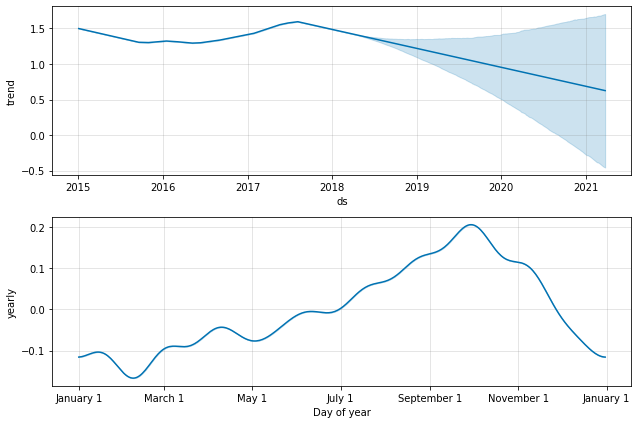

In [92]:
figure3 = model.plot_components(prediction3)

## <font color = "Brown"> Creating Region Specific Data

In [120]:
regionwise_dataframe = dataframe[dataframe["region"] == "LasVegas"]

In [121]:
regionwise_dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas
10268,50,2015-01-11,1.54,6144.55,4027.30,2083.92,0.00,33.33,33.33,0.00,0.00,organic,2015,LasVegas
1142,50,2015-01-11,0.93,274481.48,126092.05,101653.19,9591.88,37144.36,36874.44,269.92,0.00,conventional,2015,LasVegas
10267,49,2015-01-18,1.63,6032.31,3449.94,1769.04,0.00,813.33,813.33,0.00,0.00,organic,2015,LasVegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17855,2,2018-03-11,1.62,13792.54,1966.47,2132.96,0.00,9693.11,9686.91,6.20,0.00,organic,2018,LasVegas
17854,1,2018-03-18,1.66,11198.86,1458.43,2174.40,0.00,7566.03,7545.71,20.32,0.00,organic,2018,LasVegas
8731,1,2018-03-18,1.17,311526.49,76056.35,92588.91,7007.47,135873.76,80016.52,55393.91,463.33,conventional,2018,LasVegas
17853,0,2018-03-25,1.65,10720.47,1541.02,1842.23,0.00,7337.22,7283.04,54.18,0.00,organic,2018,LasVegas


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


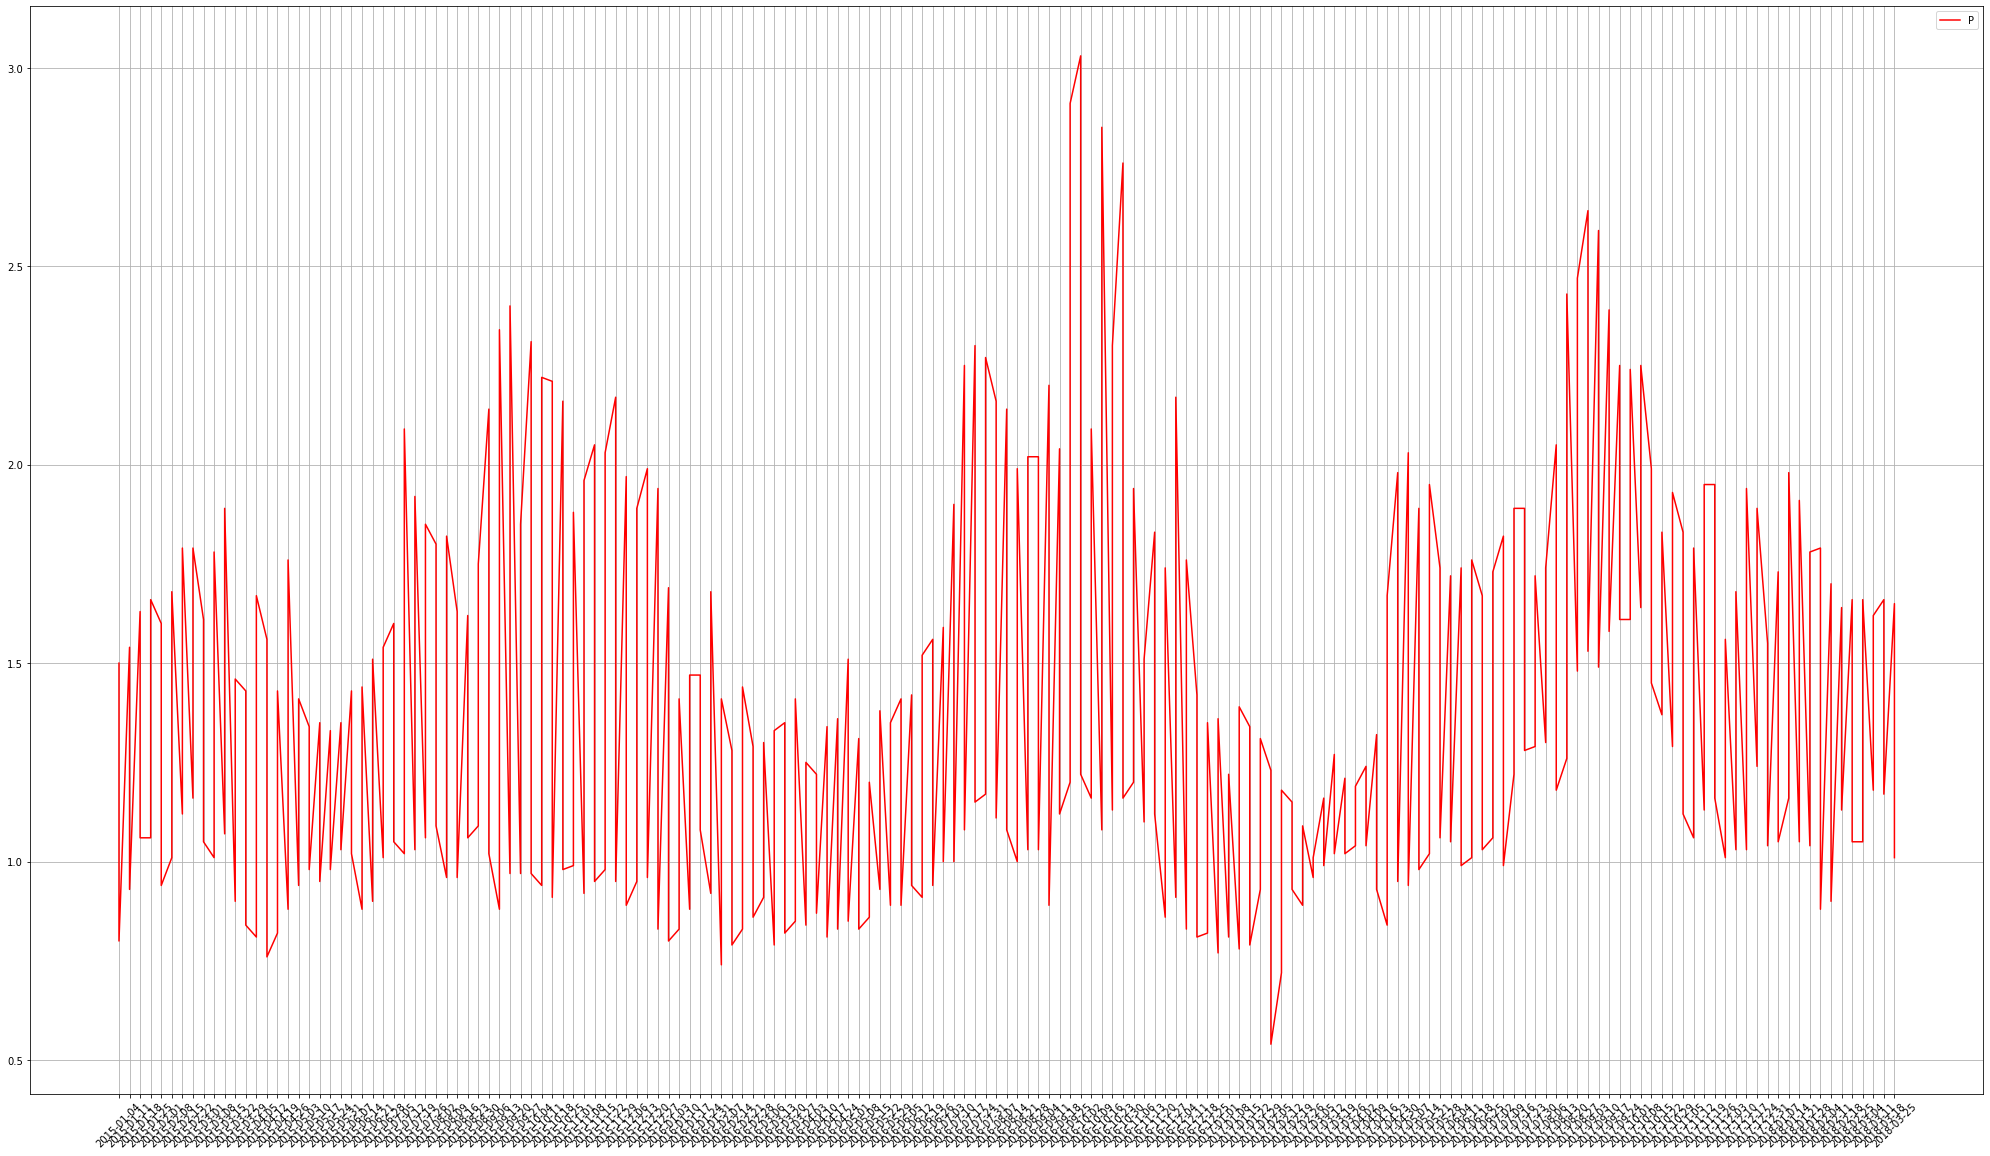

In [122]:
plt.figure(figsize = (35,20))
plt.plot(regionwise_dataframe["Date"], regionwise_dataframe["AveragePrice"], c = "red")
plt.xticks(rotation = 45)
plt.grid()
plt.legend(labels = "Price in Dollars")
plt.show()

## <font color = "Brown"> Preparing RegionWise Data

In [123]:
regionwise_dataframe = regionwise_dataframe.iloc[:, 1:3]
regionwise_dataframe = regionwise_dataframe.rename(columns = {"Date" : "ds", "AveragePrice" : "y"})

In [124]:
regionwise_dataframe

,ds,y
10269,2015-01-04,1.50
1143,2015-01-04,0.80
10268,2015-01-11,1.54
1142,2015-01-11,0.93
10267,2015-01-18,1.63
...,...,...
17855,2018-03-11,1.62
17854,2018-03-18,1.66
8731,2018-03-18,1.17
17853,2018-03-25,1.65


## <font color = "Brown"> Creating, Training, Testing, and Visualising Region_Wise_Model

In [125]:
Region_Wise_Model = Pro()

In [126]:
Region_Wise_Model.fit(regionwise_dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
region_wise_future3 = Region_Wise_Model.make_future_dataframe(periods = 1095)  # For 3 years
region_wise_prediction3 = Region_Wise_Model.predict(region_wise_future3)

In [130]:
region_wise_prediction3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.327795,0.633008,1.713487,1.327795,1.327795,-0.174865,-0.174865,-0.174865,-0.174865,-0.174865,-0.174865,0.0,0.0,0.0,1.152930
1,2015-01-04,1.327795,0.597380,1.731233,1.327795,1.327795,-0.174865,-0.174865,-0.174865,-0.174865,-0.174865,-0.174865,0.0,0.0,0.0,1.152930
2,2015-01-11,1.328449,0.628796,1.728336,1.328449,1.328449,-0.150912,-0.150912,-0.150912,-0.150912,-0.150912,-0.150912,0.0,0.0,0.0,1.177537
3,2015-01-11,1.328449,0.632824,1.749398,1.328449,1.328449,-0.150912,-0.150912,-0.150912,-0.150912,-0.150912,-0.150912,0.0,0.0,0.0,1.177537
4,2015-01-18,1.329102,0.629259,1.725252,1.329102,1.329102,-0.120960,-0.120960,-0.120960,-0.120960,-0.120960,-0.120960,0.0,0.0,0.0,1.208142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,2021-03-20,1.661647,0.863062,2.002153,1.646941,1.677824,-0.186393,-0.186393,-0.186393,-0.186393,-0.186393,-0.186393,0.0,0.0,0.0,1.475254
1429,2021-03-21,1.661815,0.916172,1.989634,1.647079,1.678002,-0.191114,-0.191114,-0.191114,-0.191114,-0.191114,-0.191114,0.0,0.0,0.0,1.470701
1430,2021-03-22,1.661982,0.919476,2.002662,1.647218,1.678176,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,0.0,0.0,0.0,1.465865
1431,2021-03-23,1.662149,0.930289,2.017888,1.647357,1.678350,-0.201361,-0.201361,-0.201361,-0.201361,-0.201361,-0.201361,0.0,0.0,0.0,1.460787


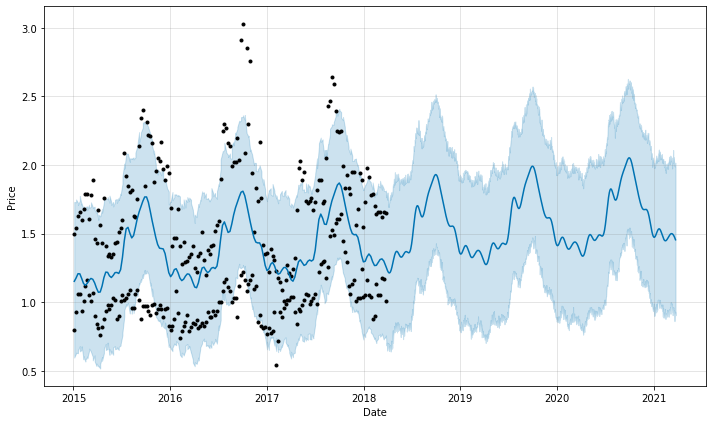

In [131]:
region_wise_figure3 = Region_Wise_Model.plot(region_wise_prediction3, xlabel = "Date", ylabel = "Price")

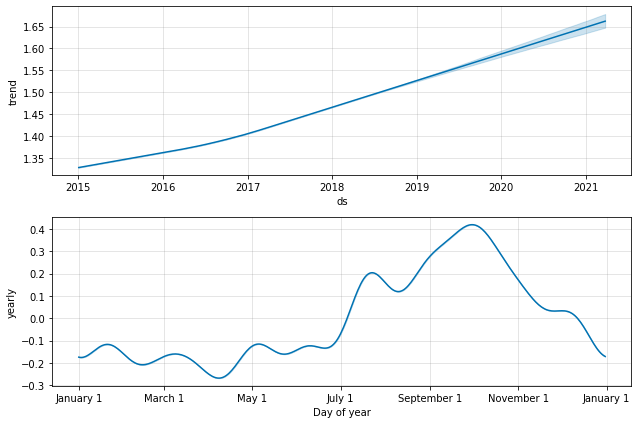

In [129]:
region_wise_Components_figure3 = Region_Wise_Model.plot_components(region_wise_prediction3)

# Here trend is going up for a specific region, but for all regions it was going done.

## <font color = "Brown"> Hope you all liked it.